In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.model_selection import cross_val_score

from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv("../input/home-data-for-ml-course/train.csv")
train = pd.DataFrame(data)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data = pd.read_csv("../input/home-data-for-ml-course/test.csv")
test = pd.DataFrame(data)
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

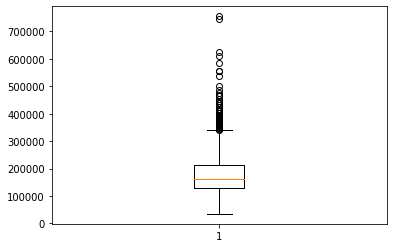

In [4]:
plt.boxplot(train['SalePrice'])
train['SalePrice'].describe()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f994b636710>,
 'caps': [<matplotlib.lines.Line2D at 0x7f994b636d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f994b6363d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f994b641410>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f994b641750>],
 'means': []}

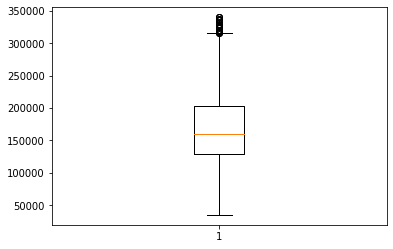

In [5]:
Q1 = np.percentile(train['SalePrice'], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(train['SalePrice'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
upper = np.where(train['SalePrice'] >= (Q3+1.5*IQR))
lower = np.where(train['SalePrice'] <= (Q1-1.5*IQR))
train.drop(upper[0], inplace = True)
train.drop(lower[0], inplace = True)
plt.boxplot(train['SalePrice'])

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
for x in train.columns:
    #printing unique values
    print(x ,':', len(train[x].unique()))

Id : 1399
MSSubClass : 15
MSZoning : 5
LotFrontage : 108
LotArea : 1017
Street : 2
Alley : 3
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
OverallQual : 10
OverallCond : 9
YearBuilt : 111
YearRemodAdd : 61
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 5
MasVnrArea : 298
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 5
BsmtCond : 5
BsmtExposure : 5
BsmtFinType1 : 7
BsmtFinSF1 : 598
BsmtFinType2 : 7
BsmtFinSF2 : 143
BsmtUnfSF : 751
TotalBsmtSF : 675
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 6
1stFlrSF : 710
2ndFlrSF : 395
LowQualFinSF : 23
GrLivArea : 810
BsmtFullBath : 4
BsmtHalfBath : 3
FullBath : 4
HalfBath : 3
BedroomAbvGr : 8
KitchenAbvGr : 4
KitchenQual : 4
TotRmsAbvGrd : 12
Functional : 7
Fireplaces : 4
FireplaceQu : 6
GarageType : 7
GarageYrBlt : 98
GarageFinish : 4
GarageCars : 5
GarageArea : 411
GarageQual : 6
GarageCond : 6
PavedDr

In [8]:
y = train['SalePrice']
train.drop(['SalePrice'], axis = 1, inplace = True)
num_df = train.select_dtypes(include=np.number)
print(num_df.shape)

# Filtering categorical data
cat_df = train.select_dtypes(exclude=np.number)
print(cat_df.shape)

(1399, 37)
(1399, 43)


In [9]:
for x in cat_df.columns:
    #printing unique values
    print(x ,':', len(cat_df[x].unique()))

MSZoning : 5
Street : 2
Alley : 3
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 5
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 5
BsmtCond : 5
BsmtExposure : 5
BsmtFinType1 : 7
BsmtFinType2 : 7
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 6
KitchenQual : 4
Functional : 7
FireplaceQu : 6
GarageType : 7
GarageFinish : 4
GarageQual : 6
GarageCond : 6
PavedDrive : 3
PoolQC : 4
Fence : 5
MiscFeature : 5
SaleType : 9
SaleCondition : 6


In [10]:
# Filling missing values by median for numerical columns 
imp_median = SimpleImputer(missing_values=np.NaN, strategy='mean')
num_df = pd.DataFrame(imp_median.fit_transform(num_df), columns=num_df.columns)
print(num_df.shape)

# Filling missing values by most frequent value for categorical columns
imp_median = SimpleImputer(missing_values=np.NaN, strategy='constant')
cat_df = pd.DataFrame(imp_median.fit_transform(cat_df), columns=cat_df.columns)
print(cat_df.shape)
    
cat_df.isnull().sum()
num_df.isnull().sum()

(1399, 37)
(1399, 43)


Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [11]:
cat_df = pd.get_dummies(cat_df)
cat_df.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_missing_value,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [12]:
cat_df.shape

(1399, 268)

In [14]:
from sklearn.ensemble import ExtraTreesRegressor

ET = ExtraTreesRegressor()

param_grid = {'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
              'max_depth': range(5, 50, 5),
              'min_samples_leaf': range(1, 11, 2),
              'min_samples_split': range(2, 15, 2),
              'n_estimators': range(50, 300, 50),
              'max_features' : ['sqrt', 'log2', None],
              'bootstrap': ['True', 'False'],
              
             }

ETC_clf = RandomizedSearchCV(estimator = ET,
                            param_distributions = param_grid,
                            scoring = 'neg_mean_absolute_error',
                            n_iter = 200,
                            cv= 2,
                            verbose=1,
                            n_jobs = -1)

ETC_clf.fit(cat_df, y)
print('Best parameters found:\n', ETC_clf.best_params_)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
Best parameters found:
 {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 45, 'criterion': 'squared_error', 'bootstrap': 'False'}


In [15]:
model = SelectFromModel(ETC_clf.best_estimator_, prefit=True)
feature_idx = model.get_support()
feature_name = cat_df.columns[feature_idx]

cat_new = pd.DataFrame(model.transform(cat_df), columns = feature_name)
cat_new.head()

,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_Reg,LandSlope_Gtl,Neighborhood_Crawfor,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,BldgType_1Fam,...,CentralAir_Y,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_missing_value,GarageType_Attchd,GarageType_Detchd,GarageFinish_Fin,GarageFinish_Unf,GarageQual_TA
0,1,0,0,1,1,0,0,0,0,1,...,1,0,1,0,1,1,0,0,0,1
1,1,0,0,1,1,0,0,0,0,1,...,1,0,0,1,0,1,0,0,0,1
2,1,0,0,0,1,0,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1
3,1,0,0,0,1,1,0,0,0,1,...,1,0,1,0,0,0,1,0,1,1
4,1,0,0,0,1,0,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1


In [16]:
# Concatinating numerical and categorical data
train = pd.concat([cat_new, num_df, y], axis=1)
train = pd.DataFrame(train)

# Verifying missing values
print(f'Total missing values: {train.isnull().sum().sum()}')
print(train.shape)
train.head()

Total missing values: 4500
(1459, 75)


,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_Reg,LandSlope_Gtl,Neighborhood_Crawfor,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,BldgType_1Fam,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [44]:
y= train['SalePrice']
X = train.drop(['SalePrice'], axis =1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [58]:
import lightgbm as lgb
import warnings
warnings.simplefilter("ignore")

lg = lgb.LGBMRegressor(objective = 'mae')

parameters = {
    'boosting_type': ['gbdt', 'dart', 'rf'],
    'num_leaves': range(5, 101, 5),
    'max_depth': [10, 201, 10],
    'learning_rate' : [x / 100.0 for x in range(10, 100, 5)],
    'n_estimators': range(50, 501, 50)
}


lgb_grid = RandomizedSearchCV(estimator = lg,
                            param_distributions = parameters,
                            scoring = 'neg_mean_absolute_error',
                            n_iter = 500,
                            cv= 3,
                            verbose=1,
                            n_jobs = -1)

lgb_grid.fit(X_train, y_train)
print('Best parameters found:\n', lgb_grid.best_params_)
print('Best MAE Score: ',lgb_grid.best_score_ )

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /__w/1/s/python-package/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check 

KeyboardInterrupt: 

In [ ]:
best_params = lg_grid.best_estimator_
y_hat = best_params.predict(X_test)
LGB_MAE = metrics.mean_absolute_error(y_hat, y_test)

print('LGB MAE: ', LGB_MAE)

LGB MAE with 0.9 dropping columns and imputing categorical data as MODE and numerical data as MEDIAN is **18496**


LGB MAE with no dropping columns and imputing categorical data as CONSTANT and numerical data as MEDIAN is **18470**

LGB MAE with no dropping columns and imputing categorical data as CONSTANT and numerical data as MEAN is **18449**

Changing Objective LGB MAE with no dropping columns and imputing categorical data as CONSTANT and numerical data as MEAN is **17897**



In [60]:
import xgboost as xgb

xgb = xgb.XGBRegressor(objective = 'mae')

parameters = {
    'objective':['reg:linear'],
    'learning_rate': [x / 100.0 for x in range(10, 100, 5)],
    'max_depth': range (2, 20, 2),
    'min_child_weight': range(2, 20, 2),
    'silent': range(1,11, 1),
    'subsample': [x / 100.0 for x in range(10, 100, 5)],
    'colsample_bytree': [x / 100.0 for x in range(10, 100, 5)],
    'n_estimators': range(50, 500, 50),
    'gamma':[x / 100.0 for x in range(10, 100, 5)]
}


xgb_grid = RandomizedSearchCV(estimator = xgb,
                            param_distributions = param_grid,
                            scoring = 'neg_mean_absolute_error',
                            n_iter = 500,
                            cv= 3,
                            verbose=1,
                            n_jobs = -1)

xgb_grid.fit(X_train, y_train)
print('Best parameters found:\n', xgb_grid.best_params_)
print('Best MAE Score: ',xgb_grid.best_score_ )

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


XGBoostError: [17:53:53] ../src/data/data.cc:458: Check failed: valid: Label contains NaN, infinity or a value too large.
Stack trace:
  [bt] (0) /opt/conda/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x16b9c9) [0x7f99266c39c9]
  [bt] (1) /opt/conda/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x178eb6) [0x7f99266d0eb6]
  [bt] (2) /opt/conda/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(+0x179d10) [0x7f99266d1d10]
  [bt] (3) /opt/conda/lib/python3.7/site-packages/xgboost/lib/libxgboost.so(XGDMatrixSetInfoFromInterface+0xa4) [0x7f9926614754]
  [bt] (4) /opt/conda/lib/python3.7/lib-dynload/../../libffi.so.8(+0x6a4a) [0x7f99b55fca4a]
  [bt] (5) /opt/conda/lib/python3.7/lib-dynload/../../libffi.so.8(+0x5fea) [0x7f99b55fbfea]
  [bt] (6) /opt/conda/lib/python3.7/lib-dynload/_ctypes.cpython-37m-x86_64-linux-gnu.so(_ctypes_callproc+0x2f4) [0x7f99b5612784]
  [bt] (7) /opt/conda/lib/python3.7/lib-dynload/_ctypes.cpython-37m-x86_64-linux-gnu.so(+0x10ff8) [0x7f99b5612ff8]
  [bt] (8) /opt/conda/bin/python(_PyObject_FastCallKeywords+0x47b) [0x55b5139e872b]



In [ ]:
best_params = xgb_grid.best_estimator_
y_hat = best_params.predict(X_test)
XGB_MAE = metrics.mean_absolute_error(y_hat, y_test)

print('XGB MAE: ', XGB_MAE)

In [ ]:
TestID.shape

In [ ]:
y_pred = clf.predict(X_new_test)

result = pd.DataFrame(y_pred, columns = ['SalePrice'])

#TID = pd.DataFrame(TestID)
sub = pd.concat([TestID, result], axis =1)
sub.head()

In [ ]:
sub.to_csv("sub.csv", index=False)

In [ ]:
sub.shape

In [ ]:
sub.head()